# 1.5.2 Harris Corner Detection

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [30]:
filename = 'sim2.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

In [31]:
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.1*dst.max()]=[255,0,0]

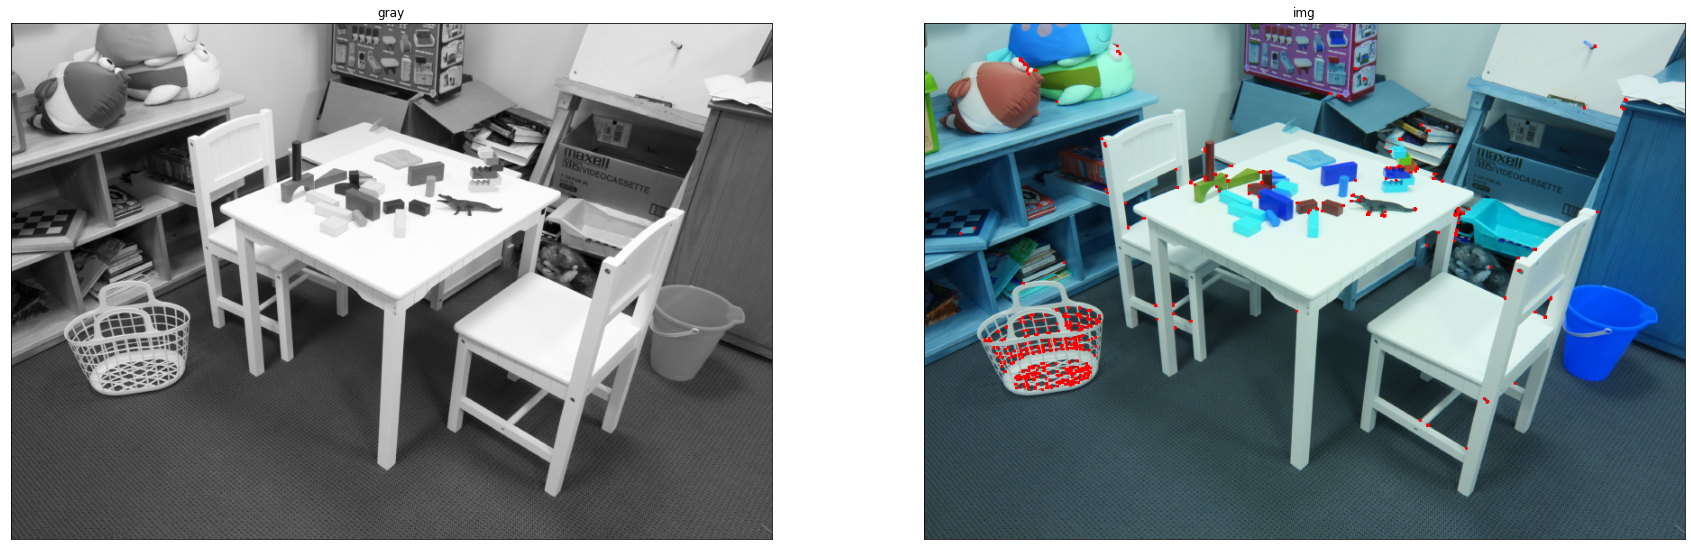

In [32]:
plt.figure(figsize = (30,45))
plt.subplot(1,2,1),plt.imshow(gray,cmap = 'gray')
plt.title('gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(img,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.show()

## with Trackbar

In [22]:
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

In [22]:
def nothing(x):
    pass

In [23]:
cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 10, 1000, nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    if(threshold <= 1):
        threshold=1
    img = cv2.imread(filename)
    img[dst>1./threshold*dst.max()]=[0,0,255]
    cv2.imshow('image',img)
cv2.destroyAllWindows()

## Corner with SubPixel Accuracy

In [24]:
import cv2
import numpy as np

In [25]:
filename = 'horse-beach.bmp' #sIMG_2164.jpg horse-beach.bmp
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [26]:
# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
#dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.2*dst.max(),255,0)
dst = np.uint8(dst)
print(ret, dst.shape)

37233395.2 (768, 1024)


In [27]:
# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

In [28]:
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

In [29]:
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
print(res.shape)

(16, 4)


In [30]:
print(res)

[[511 383 511 383]
 [426 113 425 111]
 [453 112 451 109]
 [440 156 440 155]
 [440 159 440 155]
 [615 379 614 377]
 [553 380 551 379]
 [633 381 633 381]
 [655 393 654 393]
 [496 396 497 395]
 [649 399 649 399]
 [651 398 649 399]
 [665 407 663 410]
 [669 415 667 414]
 [483 422 481 423]
 [682 428 682 428]]


In [31]:
img = cv2.imread(filename)
oimg = cv2.imread(filename)
img[res[:,1],res[:,0]]=[255,0,0]
oimg[res[:,3],res[:,2]] = [0,255,0]

In [32]:
for i in range(res.shape[0]):
    cv2.circle(img,(res[i,0],res[i,1]),3,(255,0,0),-1)
    cv2.circle(oimg,(res[i,2],res[i,3]),5,(0,255,0),-1)

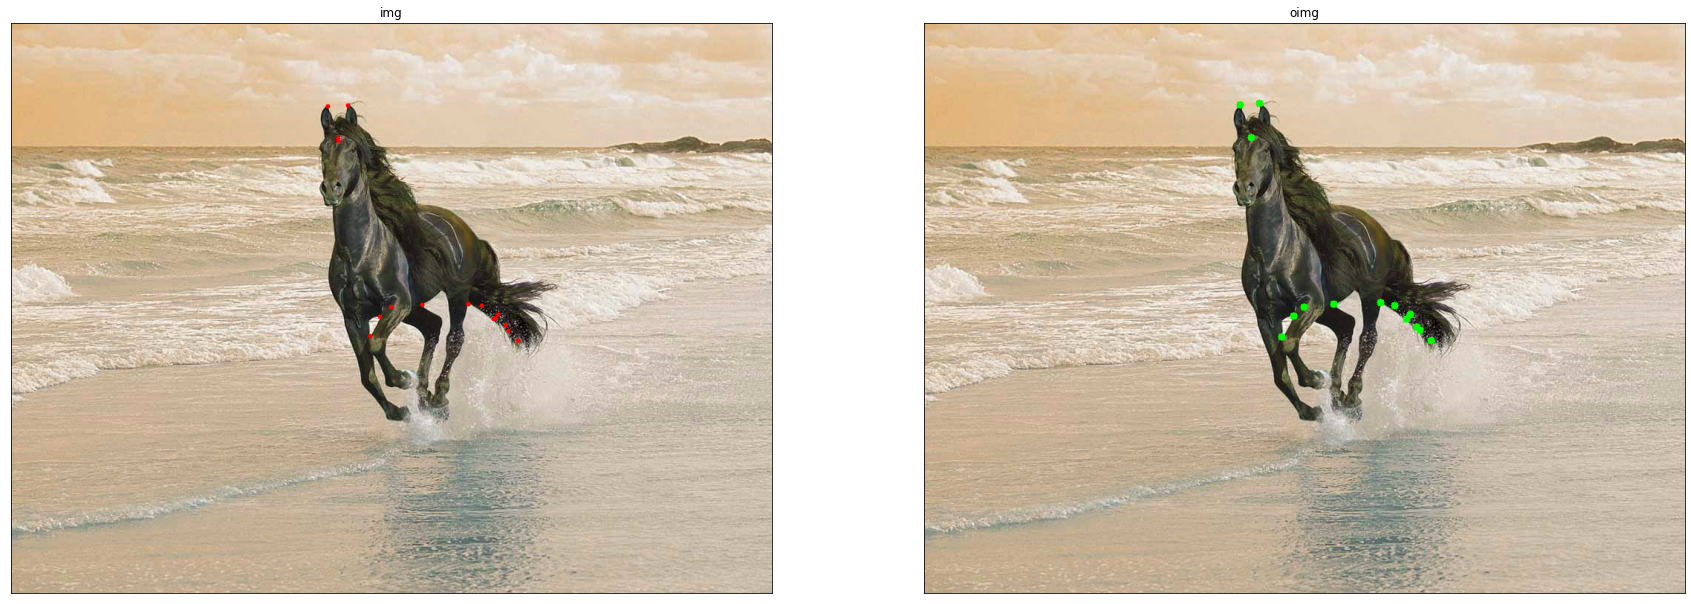

In [33]:
plt.figure(figsize = (30,45))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(oimg)
plt.title('oimg'), plt.xticks([]), plt.yticks([])
plt.show()

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

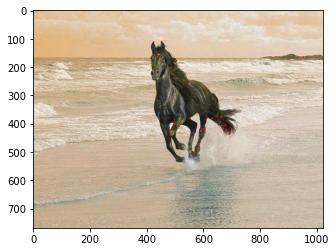

(<matplotlib.image.AxesImage at 0x21781212b50>, None)

In [34]:
img = cv2.imread('horse-beach.bmp')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)
plt.imshow(img),plt.show()

In [14]:
img = cv2.imread('sim2.png')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
imgsift = cv2.imread('sim2.png')
imgsiftrich = cv2.imread('sim2.png')
imgsiftrich=cv2.drawKeypoints(img,kp,imgsiftrich,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imgsift=cv2.drawKeypoints(img,kp,imgsift)

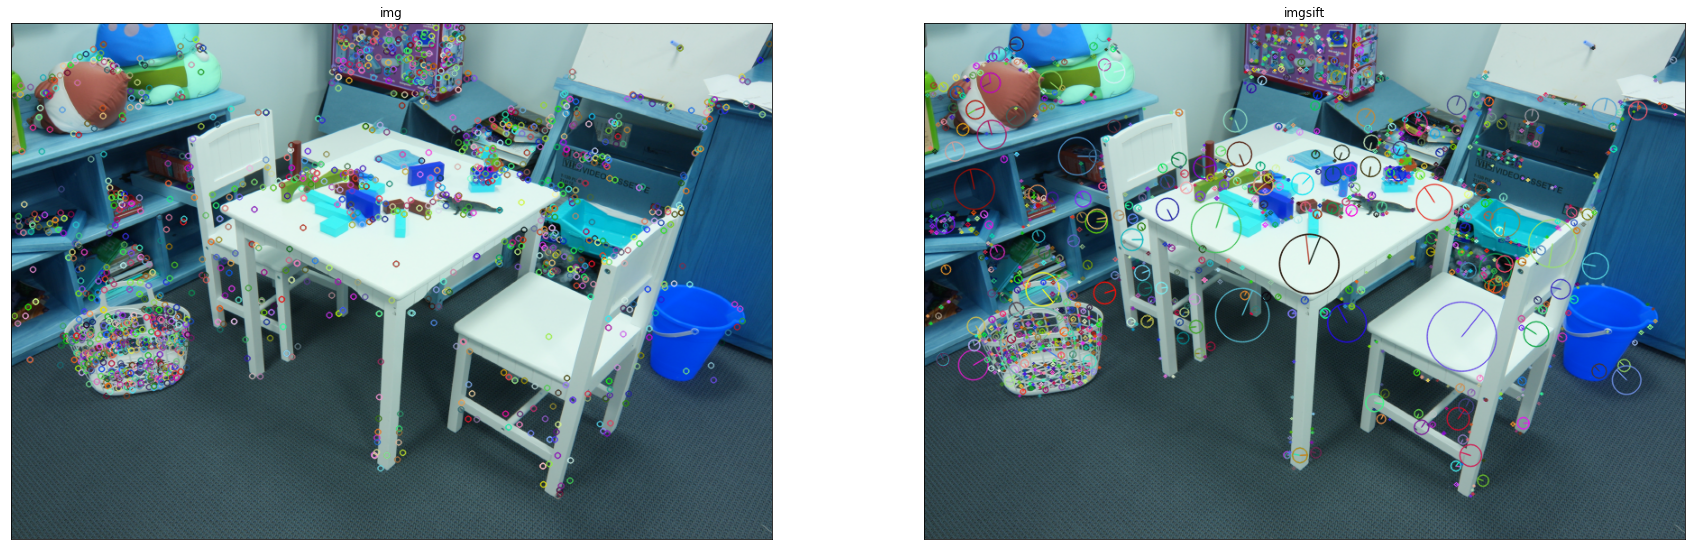

In [15]:
plt.figure(figsize = (30,45))
plt.subplot(1,2,1),plt.imshow(imgsift)
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgsiftrich)
plt.title('imgsift'), plt.xticks([]), plt.yticks([])
plt.show()